## ECE113 Lab 0 - Basic Python and DTFT <br> <small> April 23, 2021 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on CCLE.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

**A0.** you add a `?`

__Q1.__ What do you have to import to make all division a real division?

__A1.__ `from __future__ import division`

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ The standard abbreviation for numpy is `np` and for matplotlib.pyplot is `plt`

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print x

__A3.__ [7,2,3,4,5,6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [16]:
# A4.
import numpy as np
print(np.abs(np.r_[-5:5]))

[5 4 3 2 1 0 1 2 3 4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [18]:
# A5.
print(np.r_[0:5:2])

[0 2 4]


__Q6.__ Generate the same plot as in the following figure inline:
    



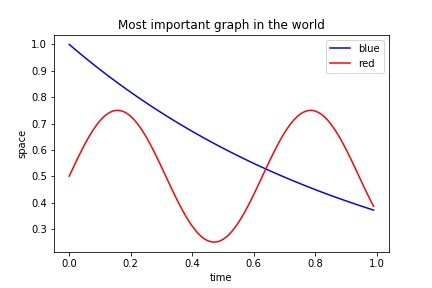

In [25]:
from IPython.display import Image
Image('tutorial_plot.jpg')

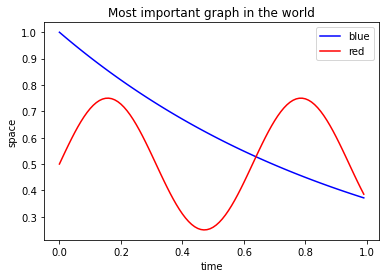

In [29]:
# A6.
import matplotlib.pyplot as plt
%matplotlib inline
x = np.r_[:1:0.01]
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5
plt.figure()
plt.plot( x, y1 , label='blue',color='blue')
plt.plot( x, y2, label='red',color='red')
plt.xlabel( "time" )
plt.ylabel( "space" )
plt.title( "Most important graph in the world" )
plt.legend()

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [30]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

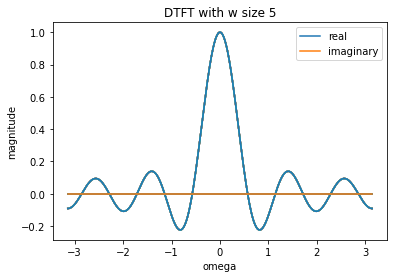

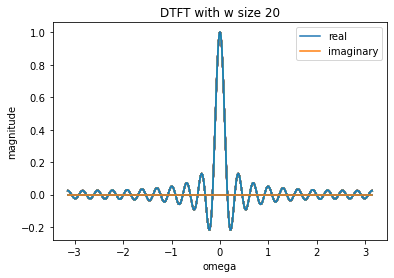

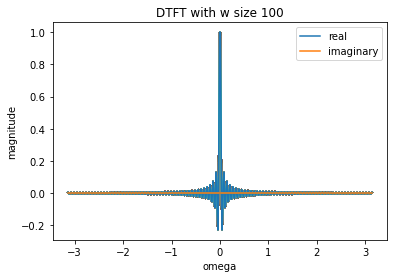

In [73]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        NN = np.r_[-N:N+1]

        # create window function (w) using np.ones
        ### FILL IN ###
        
        w = np.ones(2*N+1)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        
        n,omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        W = W/W[256]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        
        plt.figure()
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        
        plt.xlabel('omega')
        plt.ylabel('magnitude')
        plt.title(f'DTFT with w size {N}')
        plt.legend(('real','imaginary'))
        

#### Describe the effect of increasing $N$ on the DTFT:

Increasing the $N$ makes the `DTFT` oscillate more, and it makes the peak narrower.

----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

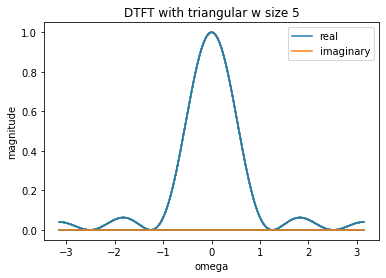

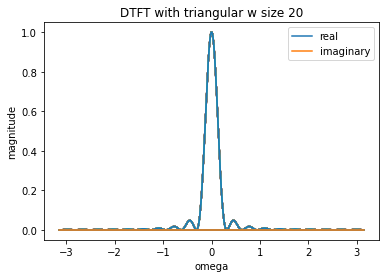

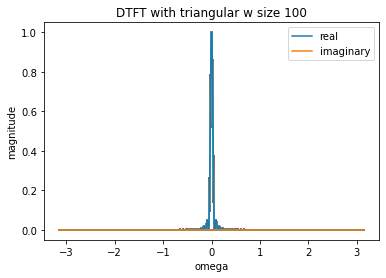

In [74]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        NN = np.r_[-N:N+1]
        
        # create window function (w) 
        ### FILL IN ###
        
        w = (1-(np.abs(NN)/N))*np.ones_like(NN)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        
        n,omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
             
        W = W/W[256]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        
        plt.figure()
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        
        plt.xlabel('omega')
        plt.ylabel('magnitude')
        plt.title(f'DTFT with triangular w size {N}')
        plt.legend(('real','imaginary'))

#### Describe the effect of increasing $N$ on the DTFT:

As $N$ increases we see that there is less of an impact from high frequency signals, this results in a narrow peak of the DTFT and a centering of the magnitudes around `0`.

----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

### Rectangular window with sinc

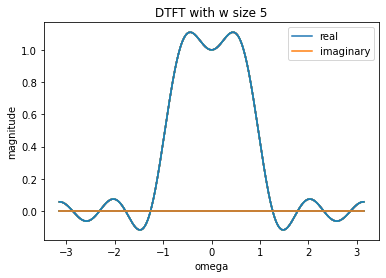

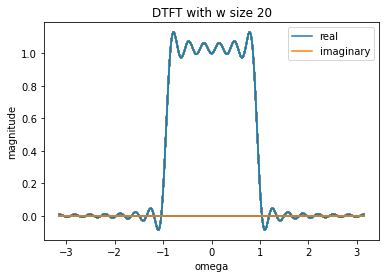

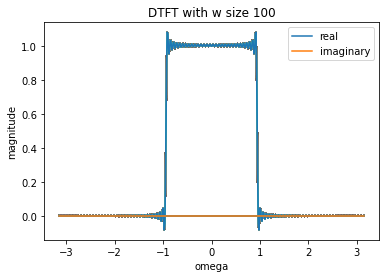

In [75]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        ### FILL IN ###
        
        w=np.ones(2*N+1)*0.3*(np.sinc(0.3*NN))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        
        n,omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        W = W/W[256]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        
        plt.figure()
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        
        plt.xlabel('omega')
        plt.ylabel('magnitude')
        plt.title(f'DTFT with w size {N}')
        plt.legend(('real','imaginary'))

## Triangle window with sinc

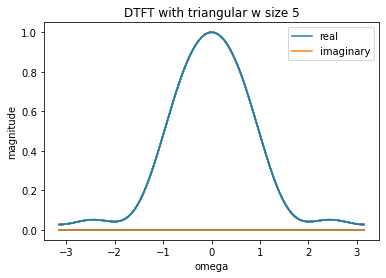

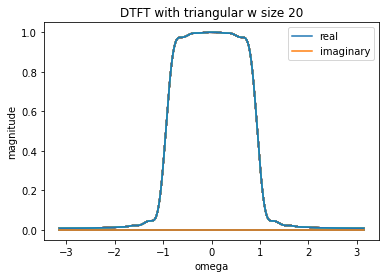

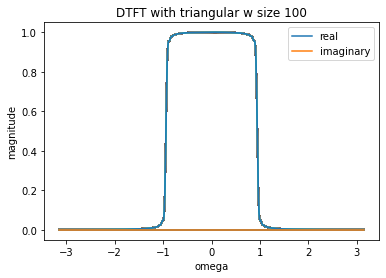

In [76]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        NN = np.r_[-N:N+1]
        
        # create window function (w)
        ### FILL IN ###
        
        w=(1-(np.abs(NN)/N))*np.ones_like(NN)*(0.3*np.sinc(0.3*NN))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        ### FILL IN ###
        
        n,omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        W = W/W[256]
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
        
        plt.figure()
        plt.plot(omega, W.real)
        plt.plot(omega, W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        
        plt.xlabel('omega')
        plt.ylabel('magnitude')
        plt.title(f'DTFT with triangular w size {N}')
        plt.legend(('real','imaginary'))

Explain the difference:

We get a much smoother result with a traingular window and we have only positive real magnitude for the triangular window.

With the rectangular window we have sharp corners which create noncontinuous frequencies which cannot be modeled well.  This is why we can see the that the triangular window gives smoother edges.

____